In [3]:
import os
iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

print(iskaggle)

!pip install -Uqq fastai 'duckduckgo_search>=6.2'

Interactive
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 234.8/234.8 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 71.6 MB/s eta 0:00:00:00:01


In [4]:
from duckduckgo_search import DDGS #DuckDuckGo has changed the api so we need to update 
from fastcore.all import *

def search_images(keywords, max_images=200): return L(DDGS().images(keywords, max_results=max_images)).itemgot('image')
import time, json

In [6]:
cat_urls = search_images('cat photos', max_images=1)

dog_urls = search_images('dog photos', max_images=1)

'https://images.pexels.com/photos/257540/pexels-photo-257540.jpeg?cs=srgb&dl=pexels-pixabay-257540.jpg&fm=jpg'

In [9]:
from fastdownload import download_url
cat_dest = 'cat.jpg'
dog_dest = 'dog.jpg'
download_url(cat_urls[0], cat_dest, show_progress=False)
download_url(dog_urls[0], dog_dest, show_progress=False)

Path('dog.jpg')

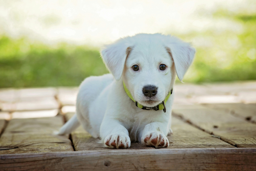

In [10]:
from fastai.vision.all import*
cat_img = Image.open(cat_dest)
dog_img = Image.open(dog_dest)

cat_img.to_thumb(256, 256)
dog_img.to_thumb(256, 256)

In [21]:
searches = 'cat','dog'
path = Path('cat_or_dog')

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    time.sleep(5)
    resize_images(path/o, max_size=400, dest=path/o)


failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

10

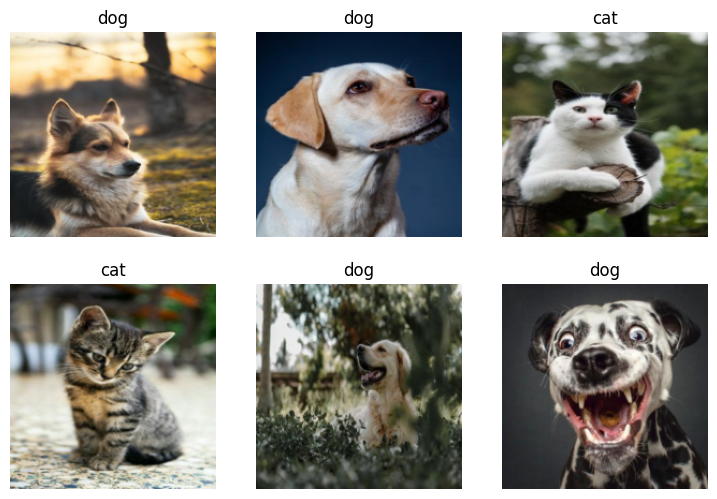

In [22]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

In [23]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 195MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.688022,0.014333,0.000000,00:02


epoch,train_loss,valid_loss,error_rate,time
0,0.097008,0.010415,0.000000,00:01
1,0.064052,0.009237,0.000000,00:01
2,0.042031,0.009693,0.000000,00:01


In [24]:
is_cat,_,probs = learn.predict(PILImage.create(cat_dest))
print(f"This is a: {is_cat}.")
print(f"Probability it's a cat: {probs[0]:.4f}")

This is a: cat.
Probability it's a cat: 0.9835
